1. Mount Google Drive & Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten


Mounted at /content/drive


2. Load Dataset

In [2]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv"
df = pd.read_csv(data_path)

print("✅ Initial dataset shape:", df.shape)
df.head()


✅ Initial dataset shape: (11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


3. Data Cleaning & Preprocessing

In [3]:
# Convert 'status' to numerical label
df['Label'] = df['status'].map({'legitimate': 0, 'phishing': 1})

# Drop non-numeric and unused columns
df = df.drop(['url', 'status'], axis=1)

# Check for missing values
print("⚠ Missing values:", df.isnull().sum().sum())
print("✅ Dataset shape after cleaning:", df.shape)

# Separate features and labels
X = df.drop('Label', axis=1).values
y = df['Label'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN: (samples, features, 1)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Training shape:", X_train.shape)
print("✅ Testing shape:", X_test.shape)


⚠ Missing values: 0
✅ Dataset shape after cleaning: (11430, 88)
✅ Training shape: (9144, 87, 1)
✅ Testing shape: (2286, 87, 1)


4. Build CNN Model

In [4]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 85, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,385 (345.25 KB)

 Trainable params: 88,385 (345.25 KB)

 Non-trainable params: 0 (0.00 B)

5. Train CNN Model

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7699 - loss: 0.4622 - val_accuracy: 0.9059 - val_loss: 0.2412
Epoch 2/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8906 - loss: 0.2771 - val_accuracy: 0.9287 - val_loss: 0.1914
Epoch 3/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9116 - loss: 0.2303 - val_accuracy: 0.9440 - val_loss: 0.1528
Epoch 4/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9160 - loss: 0.2213 - val_accuracy: 0.9423 - val_loss: 0.1512
Epoch 5/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9249 - loss: 0.2008 - val_accuracy: 0.9444 - val_loss: 0.1514
Epoch 6/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9296 - loss: 0.1934 - val_accuracy: 0.9541 - val_loss: 0.1502
Epoch 7/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9292 - loss: 0.1940 - val_accuracy: 0.9444 - val_loss: 0.1468
Epoch 8/10
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9335 - loss: 0.1809 - val_accu

 6. Evaluate Model & Visualize

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9585 - loss: 0.1290
✅ Test Accuracy: 95.49%
✅ Test Loss: 0.1266
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


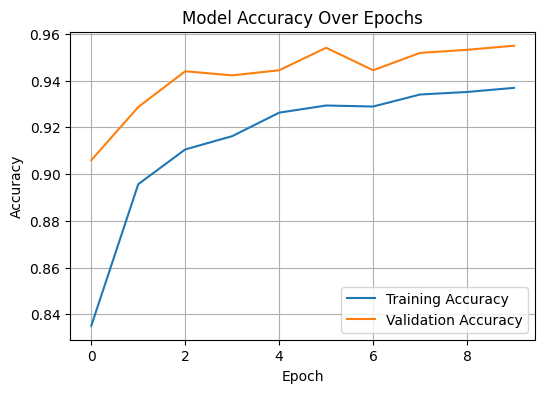

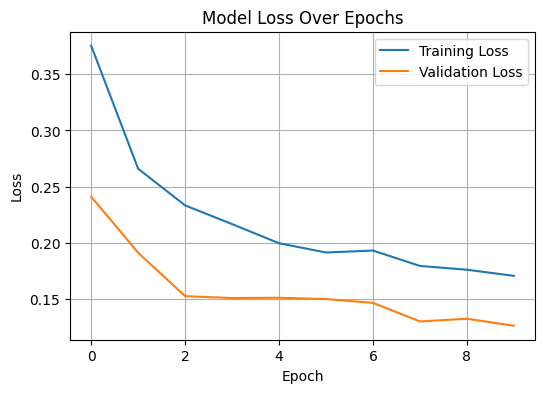

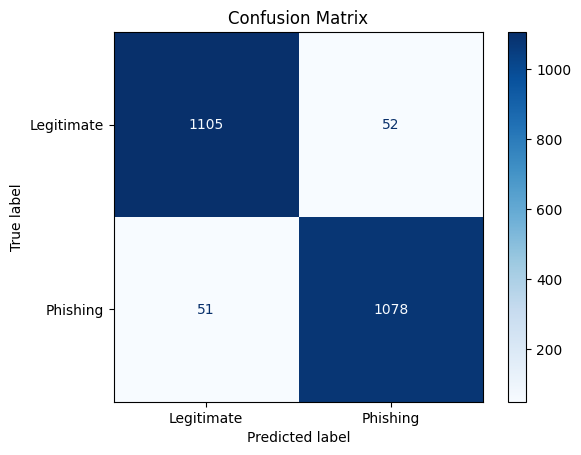


Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.96      0.96      0.96      1157
    Phishing       0.95      0.95      0.95      1129

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



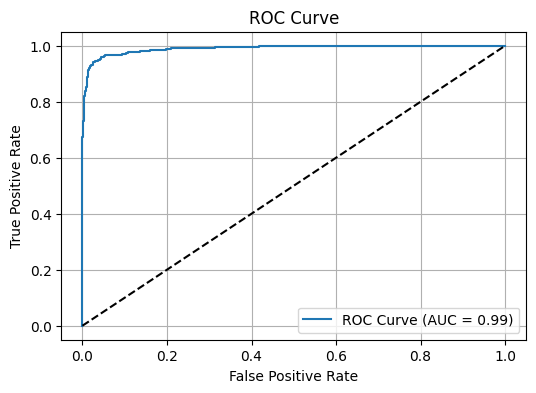

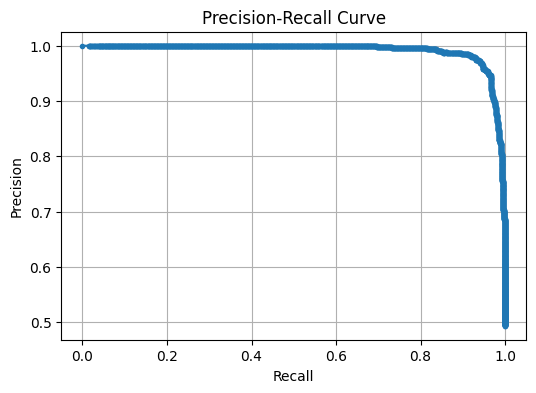

In [6]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")
print(f"✅ Test Loss: {loss:.4f}")

# Predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype("int32")

# Accuracy Curve
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curve
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Legitimate", "Phishing"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Phishing"]))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
